In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,ConfusionMatrixDisplay
from sklearn.decomposition import PCA 
import seaborn as sb
from sklearn.preprocessing import StandardScaler,LabelEncoder
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import  Dense,LSTM,SimpleRNN
import keras_tuner
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("emotions.csv")

x = df.loc[:,"fft_0_b":"label"]
y = df['label']
x.drop(columns='label',inplace=True,axis=1)
n_optimal = 45
model = PCA(n_components=45)
transformed_data =PCA.fit_transform(model,X=x)
scale = StandardScaler() 
x = scale.fit_transform(transformed_data)

encode = LabelEncoder()
y_ = encode.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y_,train_size=0.8,random_state=42)


RNN AND PCA 

-----------------RESULTS FOR RNN WTIH PCA-----------------
14/14 [==============================] - 0s 8ms/step
------------------TRAIN REPORT------------------
train accuracy =  0.9935483870967742
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       565
           1       1.00      0.99      1.00       568
           2       0.99      1.00      0.99       572

    accuracy                           0.99      1705
   macro avg       0.99      0.99      0.99      1705
weighted avg       0.99      0.99      0.99      1705



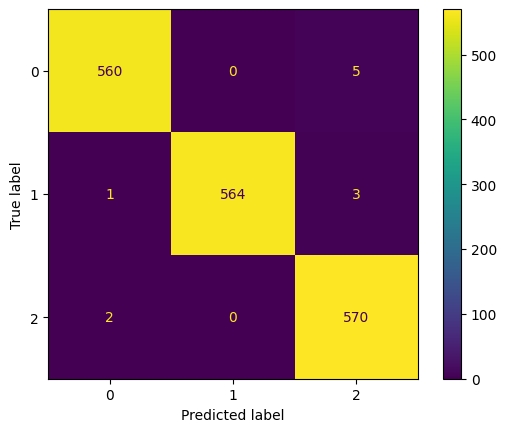

------------------TEST  REPORT------------------
test accuracy =  0.9344262295081968
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       143
           1       0.98      0.95      0.97       148
           2       0.89      0.92      0.91       136

    accuracy                           0.93       427
   macro avg       0.93      0.93      0.93       427
weighted avg       0.94      0.93      0.93       427



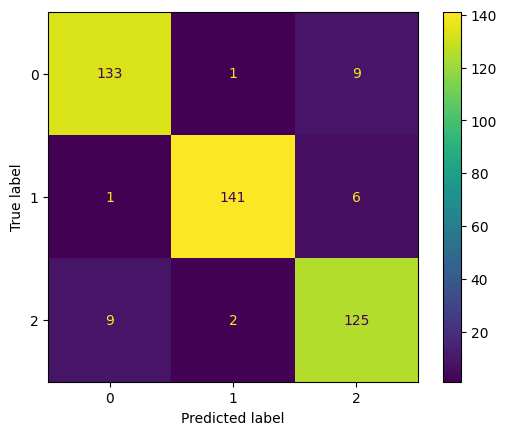

In [3]:
print("-----------------RESULTS FOR RNN WTIH PCA-----------------")
model = load_model("RNN_with_pca.h5")
y_pred_train = model.predict(x=x_train)
y_pred_train = np.argmax(y_pred_train,axis=1)
y_pred_test  = model.predict(x=x_test)
y_pred_test = np.argmax(y_pred_test,axis=1)
print("------------------TRAIN REPORT------------------")
print("train accuracy = ",accuracy_score(y_true=y_train,y_pred=y_pred_train))
print(classification_report(y_true=y_train,y_pred=y_pred_train))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_train,y_pred=y_pred_train))
shw.plot()
plt.show()
print("------------------TEST  REPORT------------------")
print("test accuracy = ",accuracy_score(y_true=y_test,y_pred=y_pred_test))
print(classification_report(y_true=y_test,y_pred=y_pred_test))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred_test))
shw.plot()
plt.show()

-----------------RESULTS FOR LSTM WTIH PCA-----------------
14/14 [==============================] - 0s 18ms/step
------------------TRAIN REPORT------------------
train accuracy =  0.8715542521994135
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       565
           1       0.98      0.90      0.94       568
           2       0.78      0.88      0.82       572

    accuracy                           0.87      1705
   macro avg       0.88      0.87      0.87      1705
weighted avg       0.88      0.87      0.87      1705



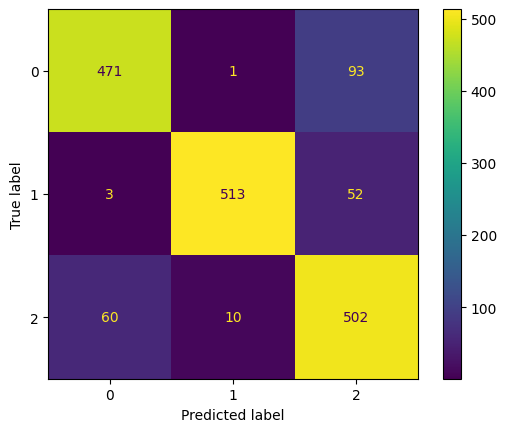

------------------TEST  REPORT------------------
test accuracy =  0.8571428571428571
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       143
           1       0.96      0.93      0.94       148
           2       0.76      0.82      0.79       136

    accuracy                           0.86       427
   macro avg       0.86      0.86      0.86       427
weighted avg       0.86      0.86      0.86       427



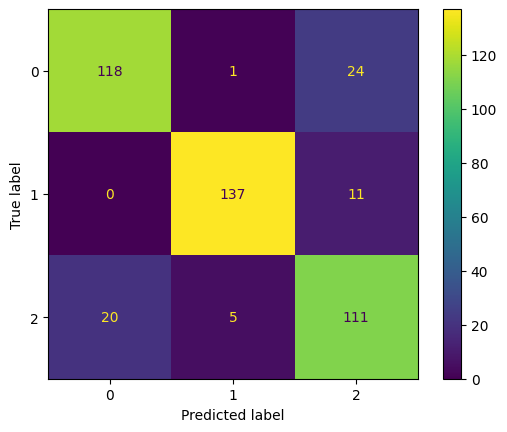

In [4]:
print("-----------------RESULTS FOR LSTM WTIH PCA-----------------")
model = load_model("LSTM_with_pca.h5")
y_pred_train = model.predict(x=x_train)
y_pred_train = np.argmax(y_pred_train,axis=1)
y_pred_test  = model.predict(x=x_test)
y_pred_test = np.argmax(y_pred_test,axis=1)
print("------------------TRAIN REPORT------------------")
print("train accuracy = ",accuracy_score(y_true=y_train,y_pred=y_pred_train))
print(classification_report(y_true=y_train,y_pred=y_pred_train))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_train,y_pred=y_pred_train))
shw.plot()
plt.show()
print("------------------TEST  REPORT------------------")
print("test accuracy = ",accuracy_score(y_true=y_test,y_pred=y_pred_test))
print(classification_report(y_true=y_test,y_pred=y_pred_test))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred_test))
shw.plot()
plt.show()

In [5]:
x = df.loc[:,"fft_0_b":"label"]
y = df['label']
x.drop(columns='label',inplace=True,axis=1)

scale = StandardScaler() 
x = scale.fit_transform(X=x)

encode = LabelEncoder()
y_ = encode.fit_transform(y)
x_train,x_test,y_train,y_test = train_test_split(x,y_,train_size=0.8,random_state=42)


-----------------RESULTS FOR RNN WTIHOUT PCA-----------------
14/14 [==============================] - 20s 1s/step
------------------TRAIN REPORT------------------
train accuracy =  0.3313782991202346
              precision    recall  f1-score   support

           0       0.33      1.00      0.50       565
           1       0.00      0.00      0.00       568
           2       0.00      0.00      0.00       572

    accuracy                           0.33      1705
   macro avg       0.11      0.33      0.17      1705
weighted avg       0.11      0.33      0.16      1705



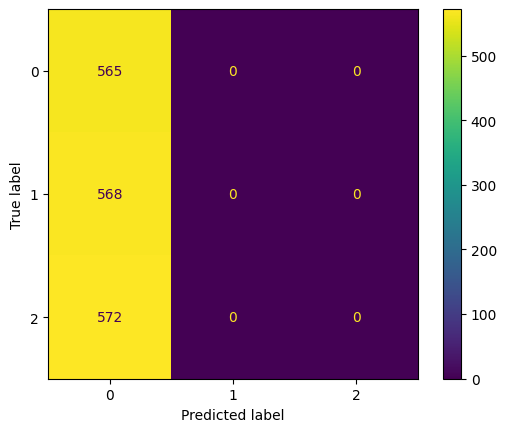

------------------TEST  REPORT------------------
test accuracy =  0.33489461358313816
              precision    recall  f1-score   support

           0       0.33      1.00      0.50       143
           1       0.00      0.00      0.00       148
           2       0.00      0.00      0.00       136

    accuracy                           0.33       427
   macro avg       0.11      0.33      0.17       427
weighted avg       0.11      0.33      0.17       427



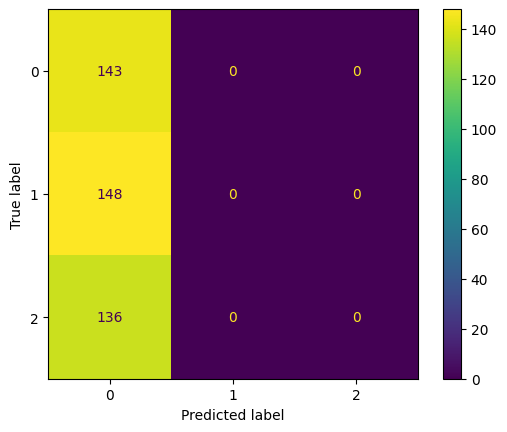

In [6]:
print("-----------------RESULTS FOR RNN WTIHOUT PCA-----------------")
model = load_model("RNN_without_pca.h5")
y_pred_train = model.predict(x=x_train)
y_pred_train = np.argmax(y_pred_train,axis=1)
y_pred_test  = model.predict(x=x_test)
y_pred_test = np.argmax(y_pred_test,axis=1)
print("------------------TRAIN REPORT------------------")
print("train accuracy = ",accuracy_score(y_true=y_train,y_pred=y_pred_train))
print(classification_report(y_true=y_train,y_pred=y_pred_train))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_train,y_pred=y_pred_train))
shw.plot()
plt.show()
print("------------------TEST  REPORT------------------")
print("test accuracy = ",accuracy_score(y_true=y_test,y_pred=y_pred_test))
print(classification_report(y_true=y_test,y_pred=y_pred_test))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred_test))
shw.plot()
plt.show()


#after knowing that the files weren't saved successfully , we tried to train it again on the GPU 
#that was allocated to us for this purpose , but till then it was assigned to someone else
#and further training an RNN with close to 600 parameters would take abnormal amount of time
#hence if needed , the model needs to be retrained and then utilized.


-----------------RESULTS FOR LSTM WTIHOUT PCA-----------------
14/14 [==============================] - 65s 5s/step
------------------TRAIN REPORT------------------
train accuracy =  0.8035190615835777
              precision    recall  f1-score   support

           0       0.74      0.96      0.83       565
           1       0.83      0.96      0.89       568
           2       0.90      0.50      0.64       572

    accuracy                           0.80      1705
   macro avg       0.82      0.80      0.79      1705
weighted avg       0.82      0.80      0.79      1705



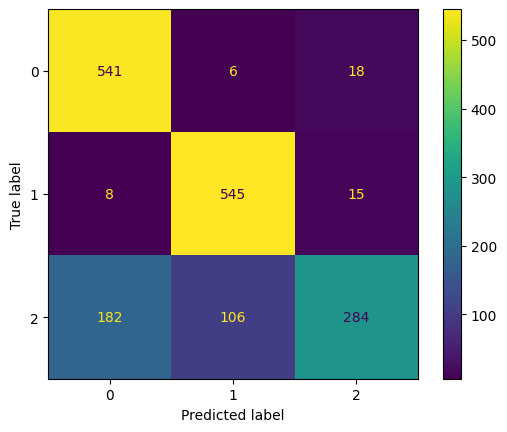

------------------TEST  REPORT------------------
test accuracy =  0.7939110070257611
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       143
           1       0.82      0.95      0.88       148
           2       0.91      0.44      0.59       136

    accuracy                           0.79       427
   macro avg       0.82      0.79      0.77       427
weighted avg       0.82      0.79      0.77       427



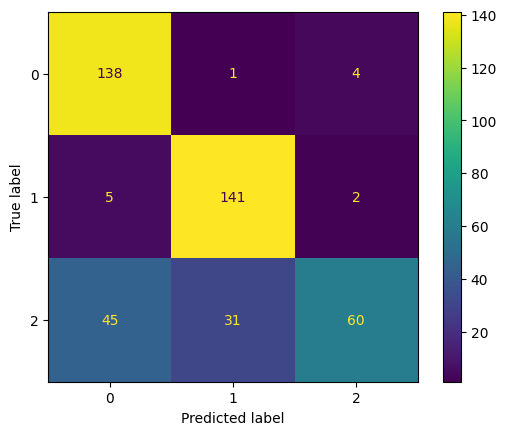

In [8]:
print("-----------------RESULTS FOR LSTM WTIHOUT PCA-----------------")
model = load_model("LSTM_without_pca.h5")
y_pred_train = model.predict(x=x_train)
y_pred_test  = model.predict(x=x_test)
y_pred_train = np.argmax(y_pred_train,axis=1)
y_pred_test = np.argmax(y_pred_test,axis=1)

print("------------------TRAIN REPORT------------------")
print("train accuracy = ",accuracy_score(y_true=y_train,y_pred=y_pred_train))
print(classification_report(y_true=y_train,y_pred=y_pred_train))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_train,y_pred=y_pred_train))
shw.plot()
plt.show()
print("------------------TEST  REPORT------------------")
print("test accuracy = ",accuracy_score(y_true=y_test,y_pred=y_pred_test))
print(classification_report(y_true=y_test,y_pred=y_pred_test))
shw = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_true=y_test,y_pred=y_pred_test))
shw.plot()
plt.show()